In [22]:
from utils import gs_to_df
from loadPos import *
from postprocess_pos_data import *
from position_analysis import *
import pandas as pd
import numpy as np
import os

sheet = gs_to_df('https://docs.google.com/spreadsheets/d/1_Xs5i-rHNTywV-WuQ8-TZliSjTxQCCqGWOD2AL_LIq0/edit#gid=0')
path_to_data = '/home/isabella/Documents/isabella/jake/recording_data/'

sheet['path'] = path_to_data + sheet['path']

sheet_inc = sheet[sheet['Include pos'] == 'Y']
trial_list = sheet_inc['trial_name']. to_list() 

# Initialise data structures

processed_posdata = pd.DataFrame(columns = ['xy_pos', 'led_pos', 'led_pix', 'speed', 'direction', 'direction_disp'])
performance = []
sector_numbers = []

# Constants
max_speed = 5  # m/s
smoothing_window_size = 3  # Choose an appropriate window size for smoothing

for n,i in enumerate(trial_list):

    if 't-maze' in i and i not in processed_posdata.index:
        try:
            # Load path
            base_folder = sheet_inc[sheet_inc['trial_name'] == i]['path'].tolist()[0]
            path = f'{base_folder}/{i}'

            # Create pos csv file if not present
            if not os.path.isfile(f'{path}_pos.csv'):
                write_csv_from_pos(f'{path}.pos')

            # Read and unpack the file
            posdata = loadPos(path)

            # Post-process the position data
            xy_pos, led_pos, led_pix, speed, direction, direction_disp = process_position_data(posdata, max_speed, smoothing_window_size)
            processed_posdata.loc[i, ['xy_pos', 'led_pos', 'led_pix', 'speed', 'direction', 'direction_disp']] = xy_pos, led_pos, led_pix, speed, direction, direction_disp

            # Calculate choice performance and add to dataframe
            performance = calculate_choices(xy_pos, assign_sectors(xy_pos.T))
            processed_posdata.loc[i, performance.keys()] = pd.Series(performance)
        except Exception as e:
            print(f'\n\nProblem with {path}')
            print(e)
            continue
        
# Map 'Age' and 'Animal' to trial_list
age_mapping = sheet.set_index('trial_name')['Age'].to_dict()
animal_mapping = sheet.set_index('trial_name')['Animal'].to_dict()

# Add 'Age' and 'Animal' columns to processed_posdata DataFrame
processed_posdata['Age'] = processed_posdata.index.map(age_mapping)
processed_posdata['Animal'] = processed_posdata.index.map(animal_mapping)
processed_posdata
        
processed_posdata

Loading pos file
1883 LED swaps detected and fixed
Animal not starting trial in centre arm
Loading pos file
1691 LED swaps detected and fixed
Sectors assigned incorrectly, please check
Loading pos file
1865 LED swaps detected and fixed
Loading pos file
1623 LED swaps detected and fixed
Loading pos file
1580 LED swaps detected and fixed
Animal not starting trial in centre arm
Loading pos file
2117 LED swaps detected and fixed
Animal not starting trial in centre arm
Loading pos file
1566 LED swaps detected and fixed
Animal not starting trial in centre arm
Loading pos file
1575 LED swaps detected and fixed
Sectors assigned incorrectly, please check
Loading pos file
1729 LED swaps detected and fixed
Loading pos file
2861 LED swaps detected and fixed
Sectors assigned incorrectly, please check
Loading pos file
1321 LED swaps detected and fixed
Sectors assigned incorrectly, please check
Loading pos file
2802 LED swaps detected and fixed
Sectors assigned incorrectly, please check
Loading pos f

/data/isabella/klusta_testdata/spikeinterface/position_analysis.py:6: RuntimeWarning: All-NaN axis encountered
  min_x = np.nanmin(xy_positions.iloc[:, 0])
/data/isabella/klusta_testdata/spikeinterface/position_analysis.py:7: RuntimeWarning: All-NaN axis encountered
  max_x = np.nanmax(xy_positions.iloc[:, 0])
/data/isabella/klusta_testdata/spikeinterface/position_analysis.py:8: RuntimeWarning: All-NaN axis encountered
  min_y = np.nanmin(xy_positions.iloc[:, 1])
/data/isabella/klusta_testdata/spikeinterface/position_analysis.py:9: RuntimeWarning: All-NaN axis encountered
  max_y = np.nanmax(xy_positions.iloc[:, 1])


Sectors assigned incorrectly, please check
Loading pos file
235 LED swaps detected and fixed
Loading pos file
361 LED swaps detected and fixed
Animal not starting trial in centre arm
Loading pos file
279 LED swaps detected and fixed
Animal not starting trial in centre arm
Loading pos file
470 LED swaps detected and fixed
Sectors assigned incorrectly, please check
Loading pos file
469 LED swaps detected and fixed
Sectors assigned incorrectly, please check
Loading pos file
133 LED swaps detected and fixed
Sectors assigned incorrectly, please check
Loading pos file
184 LED swaps detected and fixed
Animal not starting trial in centre arm
Loading pos file
117 LED swaps detected and fixed
Sectors assigned incorrectly, please check
Loading pos file
307 LED swaps detected and fixed
Animal not starting trial in centre arm
Loading pos file
331 LED swaps detected and fixed
Animal not starting trial in centre arm
Loading pos file
219 LED swaps detected and fixed
Sectors assigned incorrectly, pleas

,xy_pos,led_pos,led_pix,speed,direction,direction_disp,total_choices,total_left_choices,total_right_choices,total_correct_choices,p_correct,p_left_choices,Age,Animal
2022-12-12_r1286_t-maze_1,0 1 2 3 ...,0 1 2 3 ...,0 1 2 3 4 5 6...,"[1086.1876855685603, 10.31947575320353, 15.802...",0 228.012788 1 226.363928 2 ...,"[331.1328405304854, 113.19859051365066, 239.03...",13.0,7.0,6.0,13.0,1.000000,0.538462,33,r1286
2022-12-12_r1286_t-maze_2,0 1 2 3 4...,0 1 2 3 ...,0 1 2 3 4 5 6...,"[nan, nan, 8.569858157637581, 14.9666138444277...",0 NaN 1 NaN 2 ...,"[nan, nan, 71.56505117707799, 95.1944289077344...",24.0,14.0,10.0,21.0,0.875000,0.583333,33,r1286
2022-12-13_r1286_t-maze_1,0 1 2 3 ...,0 1 2 3 ...,0 1 2 3 4 5 6...,"[1453.4603232895538, 6.775067750677977, 4.2849...",0 310.601295 1 308.345575 2 ...,"[312.9599838012962, 90.00000000000301, 198.434...",13.0,5.0,8.0,11.0,0.846154,0.384615,34,r1286
2022-12-13_r1286_t-maze_2,0 1 2 3 ...,0 1 2 3 ...,0 1 2 3 4 5 6...,"[1462.4488683181276, 79.9917189330369, 75.1269...",0 187.386043 1 184.939216 2 ...,"[335.3583380004417, 181.94148639091432, 187.25...",13.0,7.0,6.0,11.0,0.846154,0.538462,34,r1286
2023-01-21_r1299_t-maze_1,0 1 2 3 ...,0 1 2 3 ...,0 1 2 3 4 5 6...,"[1202.431572861493, 9.771141667924137, nan, na...",0 182.663001 1 185.042451 2 ...,"[332.48203229688875, 236.30993247401673, nan, ...",4.0,2.0,2.0,4.0,1.000000,0.500000,23,r1299
2023-01-21_r1299_t-maze_2_raw,0 1 2 3 ...,0 1 2 3 ...,0 1 2 3 4 5 6...,"[1765.7235591343192, 23.312534599031938, 14.40...",0 220.100908 1 221.760300 2 ...,"[342.6774507933758, 234.46232220802352, 221.18...",5.0,2.0,3.0,3.0,0.600000,0.400000,23,r1299
2023-01-22_r1299_t-maze_1,0 1 2 3 ...,0 1 2 3 ...,0 1 2 3 4 5 6...,"[326.3979860572864, 11.173727982703678, 5.5868...",0 78.690068 1 100.922805 2 ...,"[330.6681604217525, 255.9637565320731, 104.036...",7.0,3.0,4.0,6.0,0.857143,0.428571,24,r1299
2023-01-22_r1299_t-maze_2,0 1 2 3 ...,0 1 2 3 ...,0 1 2 3 4 5 6...,"[nan, nan, 6.909240533323311, 33.4663659491289...",0 NaN 1 NaN 2 ...,"[nan, nan, 281.30993247402023, 68.629377730656...",14.0,7.0,7.0,11.0,0.785714,0.500000,24,r1299
2023-01-24_r1299_t-maze_1,0 1 2 3 4 ...,0 1 2 3 4 ...,0 1 2 3 4 5 6...,"[1843.6651171461076, nan, nan, nan, nan, 27.93...",0 10.388858 1 25.924902 2 ...,"[337.16634582208246, nan, nan, nan, nan, 345.9...",17.0,11.0,6.0,13.0,0.764706,0.647059,26,r1299
2023-01-24_r1299_t-maze_2_raw,0 1 2 3 4 ...,0 1 2 3 4 ...,0 1 2 3 4 5 6...,"[nan, nan, 35.79903743529213, nan, nan, nan, n...",0 NaN 1 NaN 2 ...,"[nan, nan, 330.52411099675385, nan, nan, nan, ...",20.0,10.0,10.0,15.0,0.750000,0.500000,26,r1299


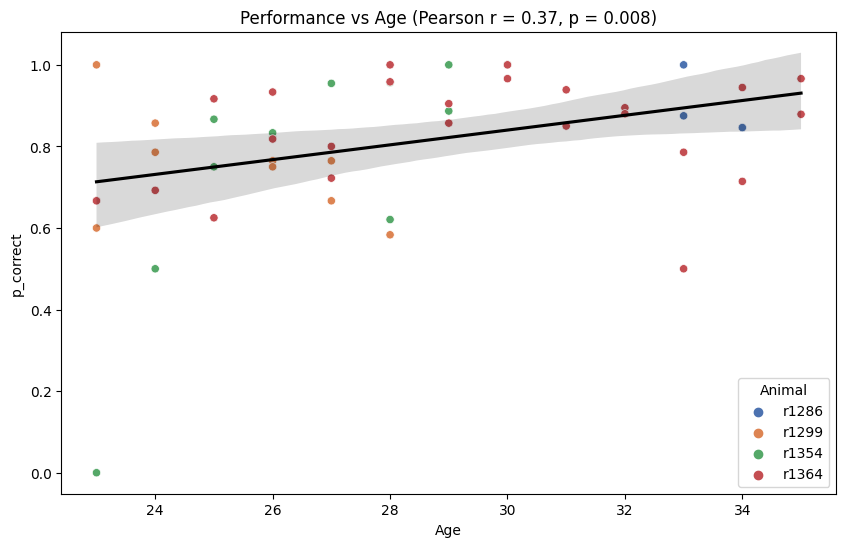

In [15]:
# Plot performance vs age, colouring by animal.

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Remove NaN values
df_clean = processed_posdata.dropna(subset=['Age', 'total_correct_choices', 'Animal', 'p_correct'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Age', y='p_correct', hue='Animal', palette="deep")

# Calculate the correlation coefficient
corr, p_val = stats.pearsonr(df_clean['Age'], df_clean['p_correct'])

# If correlation is significant, add a best fit line
if p_val < 0.05:
    sns.regplot(data=df_clean, x='Age', y='p_correct', scatter=False, color='black')

plt.title(f"Performance vs Age (Pearson r = {corr:.2f}, p = {p_val:.3f})")
plt.show()

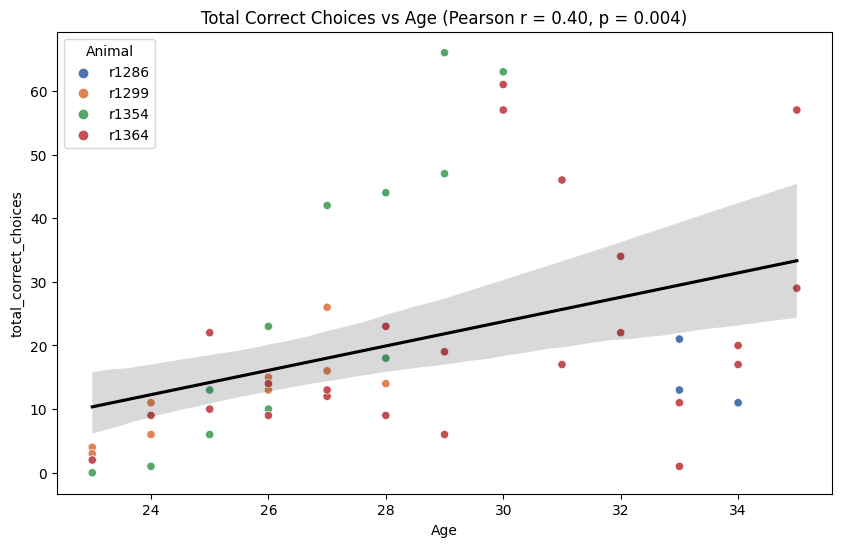

In [16]:
# Create a scatter plot for total_correct_choices vs Age

# Calculate the correlation coefficient
corr, p_val = stats.pearsonr(df_clean['Age'], df_clean['total_correct_choices'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Age', y='total_correct_choices', hue='Animal', palette="deep")

# If correlation is significant, add a best fit line
if p_val < 0.05:
    sns.regplot(data=df_clean, x='Age', y='total_correct_choices', scatter=False, color='black')

plt.title(f"Total Correct Choices vs Age (Pearson r = {corr:.2f}, p = {p_val:.3f})")
plt.show()


In [21]:
XY = processed_posdata.loc['2022-12-12_r1286_t-maze_1','xy_pos']
XY.to_csv('XY.csv')


In [ ]:
import matplotlib.pyplot as plt

X = xy_pos.iloc[0,:]
Y = xy_pos.iloc[1,:]
angles = direction_disp  # Random angles in radians

# Create masks for valid (non-nan) X, Y, angles, and speed data
mask = ~np.isnan(X) & ~np.isnan(Y) & ~np.isnan(angles) & ~np.isnan(speed)

# Compute arrow directions, scaled by speed
U = speed[mask] * np.cos(angles[mask])
V = speed[mask] * np.sin(angles[mask])

plt.figure()
#Plot every 10th point for visibility
plt.quiver(X[mask][::10], Y[mask][::10], U[::10], V[::10], angles='xy', scale_units='xy', scale=20)
plt.show()

In [ ]:
# Define the reward and start sectors
reward_sectors = [1, 9]
start_sector = 8

sector_numbers = assign_sectors(xy_pos.T)
plt.scatter(xy_pos.iloc[0,:], xy_pos.iloc[1,:], c = sector_numbers)
plt.colorbar()
plt.show()